In [155]:
import pandas as pd

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
df = pd.read_csv('the_big_df.csv', header = 0, sep = ',')

In [158]:
df.head()

,src_ip,dst_ip,src_port,dst_port,first_pkt_time,last_pkt_time,avg_hops,avg_packet_len,nodeRelatedMessages:HeartbeatRequest,nodeRelatedMessages:HeartbeatResponse,nodeRelatedMessages:PFDManagementRequest,nodeRelatedMessages:PFDManagementResponse,nodeRelatedMessages:AssociationSetupRequest,nodeRelatedMessages:AssociationSetupResponse,nodeRelatedMessages:AssociationUpdateRequest,nodeRelatedMessages:AssociationUpdateResponset,nodeRelatedMessages:AssociationReleaseRequest,nodeRelatedMessages:AssociationReleaseResponse,nodeRelatedMessages:VersionNotSupportedResponse,nodeRelatedMessages:NodeReportRequest,nodeRelatedMessages:NodeReportResponse,nodeRelatedMessages:SessionSetDeletionRequest,nodeRelatedMessages:SessionSetDeletionResponse,sessionRelatedMessages:SessionEstablishmentRequest,sessionRelatedMessages:SessionEstablishmentResponse,sessionRelatedMessages:SessionModificationRequest,sessionRelatedMessages:SessionModificationResponse,sessionRelatedMessages:SessionDeletionRequest,sessionRelatedMessages:SessionDeletionResponse,sessionRelatedMessages:SessionReportRequest,sessionRelatedMessages:SessionReportResponse,class
0,6003::1004,2000::100:502,8814,14608,1.603074e+09,1.603074e+09,190,230,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,4,63,301,149,30,32,182,135,0
1,14.173.200.75,6003::100a,40356,3120,1.603141e+09,1.603142e+09,190,161,8,3,0,0,0,0,0,0,0,0,0,0,0,0,0,13,46,420,459,16,11,63,28,1
2,99.173.254.198,190.170.118.18,48162,62144,1.603089e+09,1.603089e+09,190,130,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,80,14,412,385,143,51,1,144,1
3,6003::1002,6003::1002,14600,14605,1.603074e+09,1.603074e+09,190,231,3,8,0,0,0,0,0,0,0,0,0,0,0,0,0,57,30,365,528,14,33,22,124,0
4,6003::1005,2000::100:505,14603,8814,1.603074e+09,1.603075e+09,190,259,1,13,0,0,0,0,0,0,0,0,0,0,0,0,0,15,6,615,617,58,33,28,19,0


In [159]:
data = df.iloc[:, 6:-1] # data, without 'class' column
target = df.iloc[:, -1] #target, only 'class' column

In [160]:
X_train, X_test, Y_train, Y_test = \
    train_test_split(data, target, random_state=42, train_size=0.75)
assert X_train.shape[0] + X_test.shape[0] == df.shape[0]
print ("train size={}, test_size={}, total_size={}" \
       .format(X_train.shape[0], X_test.shape[0], df.shape[0]))

train size=750, test_size=250, total_size=1000


In [161]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
    
from sklearn.model_selection import GridSearchCV

In [162]:
labels = []
means = []

def create_lists(algorithm, accuracy):
    labels.append(algorithm)
    means.append(float('{:.2f}'.format(accuracy)))

In [163]:
log_model = LogisticRegression(random_state=42, max_iter=10000).fit(X_train, Y_train)

In [164]:
skfold = StratifiedKFold(n_splits=3)

In [165]:
log_scores = cross_val_score(log_model, data, target, cv=skfold)

In [166]:
print("Accuracy : {}".format(log_scores))
print("Mean accuracy: {:.2f}".format(log_scores.mean()))

Accuracy : [0.91916168 0.92192192 0.90690691]
Mean accuracy: 0.92


In [167]:
create_lists('Logistic Regression', log_scores.mean())

In [168]:
knn_model = KNeighborsClassifier(n_neighbors=3).fit(X_train, Y_train)

In [169]:
knn_scores = cross_val_score(knn_model, data, target, cv=skfold)

In [170]:
print("Accuracy : {}".format(knn_scores))
print("Mean accuracy: {:.2f}".format(knn_scores.mean()))

Accuracy : [0.87125749 0.88888889 0.87687688]
Mean accuracy: 0.88


In [171]:
create_lists('K-Neighbors', knn_scores.mean())

In [172]:
svm_model = svm.SVC().fit(X_train, Y_train)

In [173]:
svm_scores = cross_val_score(svm_model, data, target, cv=skfold)

In [174]:
print("Accuracy : {}".format(svm_scores))
print("Mean accuracy: {:.2f}".format(svm_scores.mean()))

Accuracy : [0.8742515  0.9009009  0.87387387]
Mean accuracy: 0.88


In [175]:
create_lists('SVM', svm_scores.mean())

In [176]:
dtree_model = DecisionTreeClassifier(random_state=42).fit(X_train, Y_train)

In [177]:
dtree_scores = cross_val_score(dtree_model, data, target, cv=skfold)

In [178]:
print("Accuracy : {}".format(dtree_scores))
print("Mean accuracy: {:.2f}".format(dtree_scores.mean()))

Accuracy : [0.93113772 0.92492492 0.93093093]
Mean accuracy: 0.93


In [179]:
create_lists('Decision Tree', dtree_scores.mean())

In [180]:
rforest_model = RandomForestClassifier(n_estimators=10).fit(X_train, Y_train)

In [181]:
rforest_scores = cross_val_score(rforest_model, data, target, cv=skfold)

In [182]:
print("Accuracy : {}".format(rforest_scores))
print("Mean accuracy: {:.2f}".format(rforest_scores.mean()))

Accuracy : [0.94011976 0.95795796 0.95795796]
Mean accuracy: 0.95


In [183]:
create_lists('Random Forest', rforest_scores.mean())

In [187]:
# GaussianNBреализует гауссовский наивный байесовский алгоритм для классификации.
# https://scikit-learn.org/stable/modules/naive_bayes.html
gnb_model = GaussianNB().fit(X_train, Y_train)

In [188]:
gnb_scores = cross_val_score(gnb_model, data, target, cv=skfold)

In [189]:
print("Accuracy : {}".format(gnb_scores))
print("Mean accuracy: {:.2f}".format(gnb_scores.mean()))

Accuracy : [0.95508982 0.95495495 0.95795796]
Mean accuracy: 0.96


In [190]:
create_lists('Naive Bayes', gnb_scores.mean())

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 0, 'ML Algorithm')

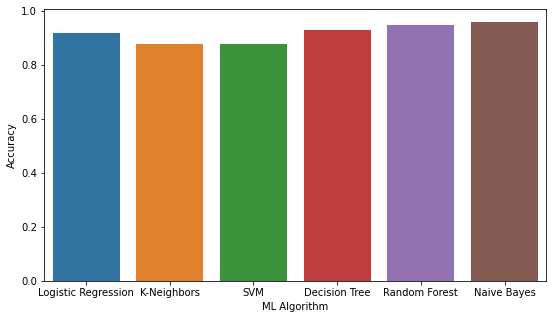

In [192]:
plt.figure(figsize = (9,5))
sns.barplot(x = pd.Series(labels), y = pd.Series(means))
plt.ylabel('Accuracy')
plt.xlabel('ML Algorithm')

In [193]:
df_temp = dict(zip(labels, means))

In [194]:
df_temp

{'Logistic Regression': 0.92,
 'K-Neighbors': 0.88,
 'SVM': 0.88,
 'Decision Tree': 0.93,
 'Random Forest': 0.95,
 'Naive Bayes': 0.96}

In [195]:
#создание датасета с наглядными названиями алгоритмов и их точностью в соотвествии с обобщающей способностью алгоритма 
#(в одну строку)
beauty = pd.DataFrame(df_temp, index=['accuracy'])

In [196]:
#beauty.style.set_table_styles([dict(selector="th",props=[('max-column', '100px')])])

In [197]:
beauty

,Logistic Regression,K-Neighbors,SVM,Decision Tree,Random Forest,Naive Bayes
accuracy,0.92,0.88,0.88,0.93,0.95,0.96


In [198]:
#создание датасета с наглядными названиями алгоритмов и их точностью в соотвествии с обобщающей способностью алгоритма 
#(в виде таблицы)
another_beauty = pd.concat([pd.Series(labels, name='ML Algorithm'), pd.Series(means, name='Accuracy')], axis=1)

In [199]:
another_beauty

,ML Algorithm,Accuracy
0,Logistic Regression,0.92
1,K-Neighbors,0.88
2,SVM,0.88
3,Decision Tree,0.93
4,Random Forest,0.95
5,Naive Bayes,0.96


In [200]:
#выбрать три лучших алгоритма
another_beauty.sort_values('Accuracy', ascending=False).head(3).reset_index()

,index,ML Algorithm,Accuracy
0,5,Naive Bayes,0.96
1,4,Random Forest,0.95
2,3,Decision Tree,0.93


In [201]:
from sklearn.model_selection import GridSearchCV

In [202]:
RandFor = RandomForestClassifier()

In [84]:
#https://vc.ru/ml/147132-kak-avtomaticheski-podobrat-parametry-dlya-modeli-mashinnogo-obucheniya-ispolzuem-gridsearchcv
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

In [85]:
randgrid = GridSearchCV(RandFor, parametrs)

In [87]:
randgrid.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [88]:
randgrid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 40}

In [89]:
from sklearn import metrics

In [91]:
prediction_randgrid = randgrid.predict(X_test)

In [94]:
#accuracy доля правильно классифицированных объектов
acc_randgrid = metrics.accuracy_score(Y_test, prediction_randgrid)

In [95]:
acc_randgrid

0.972

In [102]:
#precision точность при отнесении объектов к нулевому классу (normal)
prec_randgrid_0 = metrics.precision_score(Y_test, prediction_randgrid, pos_label=0)

In [103]:
prec_randgrid_0

0.9548387096774194

In [106]:
#precision точность при отнесении объектов к первому классу (abnormal)
prec_randgrid_1 = metrics.precision_score(Y_test, prediction_randgrid)

In [107]:
prec_randgrid_1

1.0

In [117]:
#recall полнота
rec_randgrid_0 = metrics.recall_score(Y_test, prediction_randgrid, pos_label=0)
rec_randgrid_1 = metrics.recall_score(Y_test, prediction_randgrid)

In [118]:
rec_randgrid_0

1.0

In [119]:
rec_randgrid_1

0.9313725490196079

In [120]:
#f-score
f_randgrid_0 = metrics.f1_score(Y_test, prediction_randgrid, pos_label=0)
f_randgrid_1 = metrics.f1_score(Y_test, prediction_randgrid)

In [121]:
f_randgrid_0

0.9768976897689768

In [122]:
f_randgrid_1

0.9644670050761421

In [123]:
print(metrics.classification_report(Y_test, prediction_randgrid))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       148
           1       1.00      0.93      0.96       102

    accuracy                           0.97       250
   macro avg       0.98      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



In [124]:
# support - сколько изначально было объектов в разных классах -> што?
# первые строки - характеристики в разрезе классов
# думаю, что последняя строка - то, во что превратилось avg/total, усредненное значение по метрикам
# я так глянула - можно только эту таблицу взять, она выдает те же результаты, только все вместе

In [127]:
# ROC-кривая нужна для того, чтобы оценить качество модели
# пунктиром задана кривая для классификатора, который предсказывает случайным образом

# сначала нужно получить вероятностные характеристики, стр. 219-220 в книге
randgrid_probabilities = randgrid.predict_proba(X_test)
# затем получить ложноположительные и истинноположительные доли вероятностей
false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(Y_test, randgrid_probabilities[:,1])

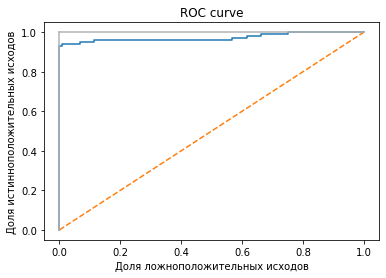

In [130]:
# строим график
plt.title("ROC curve")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel("Доля истинноположительных исходов")
plt.xlabel("Доля ложноположительных исходов")
plt.show()

In [136]:
# просто данные для красивого и правильного ROC
from sklearn.datasets import make_classification
features, target = make_classification(n_samples=10000,
                                       n_features=10,
                                       n_classes=2,
                                       n_informative=3,
                                       random_state=3)
# Разбить на тренировочный и тестовый наборы
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)
# Создать логистический регрессионный классификатор
logit = LogisticRegression()
# Натренировать модель
logit.fit(features_train, target_train)
# Получить предсказанные вероятности
target_probabilities = logit.predict_proba(features_test)[:,1]
# Создать доли истинно- и ложноположительных исходов
fpr, tpr, _ = metrics.roc_curve(target_test, target_probabilities)

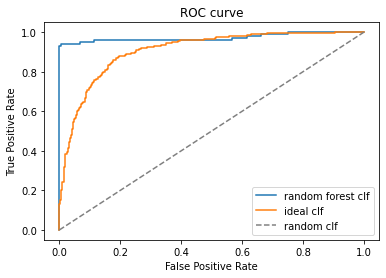

In [137]:
plt.plot(false_positive_rate, true_positive_rate, label='random forest clf')
plt.plot(fpr, tpr, label='ideal clf')
plt.plot([0,1], [0,1], '--', color='grey', label='random clf')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
# https://ru.coursera.org/lecture/supervised-learning/mietriki-kachiestva-sklearn-metrics-f63de

In [139]:
# чтобы количественно оценить качество модели, надо посчитать площадь подкривой
# можно передать как вероятностную классификацию, так и по меткам
# по меткам в рамках группы элементны могут идти в случайном порядке
# вероятностные более упорядоченны
# поэтому значения будут близкими, но все же разными

In [140]:
metrics.roc_auc_score(Y_test, prediction_randgrid) # метки

0.9656862745098039

In [141]:
metrics.roc_auc_score(Y_test, randgrid_probabilities[:,1]) # метки

0.9727080021197668

In [143]:
# логистические потери, чем меньше, тем лучше
metrics.log_loss(Y_test, prediction_randgrid)

0.9670857390574998

In [145]:
bayesgrid = GaussianNB()

In [ ]:
parametrs = {
    
}